In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
from PIL import Image
from IPython.display import display

# Filter harmless warnings
import warnings
warnings.filterwarnings("ignore")

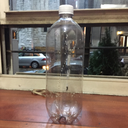

In [3]:
with Image.open('../data/kaggle_train_128/train_128/0/00000.png') as im:
    display(im)

In [4]:
path = '../data/kaggle_train_128/train_128/'
img_names = []

for folder, subfolders, filenames in os.walk(path):
    for img in filenames:
        img_names.append(folder+'/'+img)

print('Images: ',len(img_names))

Images:  15000


In [5]:
# Start by creating a list
img_sizes = []
rejected = []

for item in img_names:
    try:
        with Image.open(item) as img:
            img_sizes.append(img.size)
    except:
        rejected.append(item)
        
print(f'Images:  {len(img_sizes)}')
print(f'Rejects: {len(rejected)}')

Images:  15000
Rejects: 0


In [6]:
# Convert the list to a DataFrame
df = pd.DataFrame(img_sizes)

# Run summary statistics on image widths
df[0].describe()

count    15000.0
mean       128.0
std          0.0
min        128.0
25%        128.0
50%        128.0
75%        128.0
max        128.0
Name: 0, dtype: float64

In [7]:
# Run summary statistics on image heights
df[1].describe()

count    15000.0
mean       128.0
std          0.0
min        128.0
25%        128.0
50%        128.0
75%        128.0
max        128.0
Name: 1, dtype: float64

(128, 128)


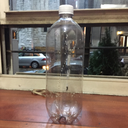

In [9]:
bottle = Image.open('../data/kaggle_train_128/train_128/0/00000.png')
print(bottle.size)
display(bottle)

In [11]:
r, g, b = bottle.getpixel((0, 0))
print(r,g,b)

243 228 203


torch.Size([3, 128, 128])


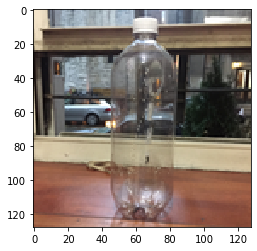

In [13]:
transform = transforms.Compose([
    transforms.ToTensor()
])
im = transform(bottle)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [14]:
im[:,0,0]

tensor([0.9529, 0.8941, 0.7961])

torch.Size([3, 224, 224])


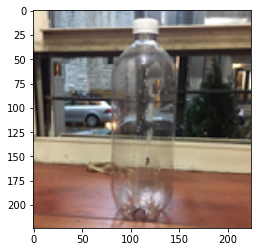

In [15]:
transform = transforms.Compose([
    transforms.Resize(224), 
    transforms.ToTensor()
])
im = transform(bottle)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

torch.Size([3, 100, 100])


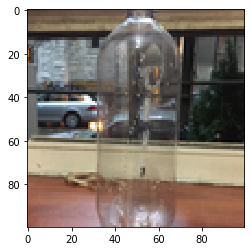

In [22]:
transform = transforms.Compose([
    transforms.CenterCrop(100), 
    transforms.ToTensor()
])
im = transform(bottle) # this crops the original image
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

torch.Size([3, 100, 100])


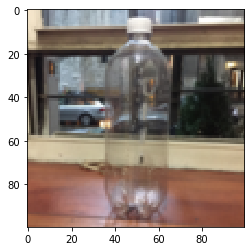

In [25]:
transform = transforms.Compose([
    transforms.Resize(100),
    transforms.CenterCrop(100), 
    transforms.ToTensor()
])
im = transform(bottle)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 128, 128])


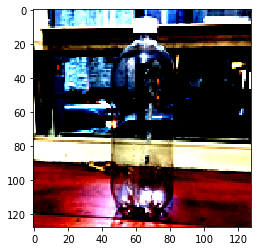

In [26]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])
im = transform(bottle)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));